<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task/blob/main/DW21Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#merge those two csv files (after getting as dataframes, get them as a single dataframe)
# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['/content/dw21/college_1.csv', '/content/dw21/college_2.csv']), ignore_index=True)
print(df)

              Name  python  mysql  Previous Geekions  CodeKata Score  \
0        A.Dharani    82.0   20.0              24500           24500   
1      V.JEEVITHA     82.0   20.0              21740           21740   
2      HEMAVATHI.R   100.0  100.0              19680           19680   
3      Mugunthan S   100.0   47.0              10610           10610   
4      Sathammai.S   100.0    8.0               8980            8980   
..             ...     ...    ...                ...             ...   
114  praveen raj j    24.0    0.0               2380            2380   
115     AMARNATH D    -1.0   12.0               1890            1890   
116           bala    32.0    0.0               1720            1720   
117           XY Z    -1.0   -1.0                  0               0   
118      Hariharan    -1.0   -1.0                  0               0   

                                    Department  Rising  python_en  \
0             Computer Science and Engineering       0        NaN 

In [5]:
df.to_csv("merged.csv")


In [6]:
#consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv

Exceeded=df[df["CodeKata Score"]>15000]
Exceeded.to_csv("Exceeded")

In [7]:
#if 10000<codekata score<15000 (Reached_expectations.csv)
Reached=df[(df["CodeKata Score"]>10000) & (df["CodeKata Score"]<15000)]
Reached.to_csv("Reached_expectations")

In [8]:
#if 7000<codekata score<10000 (Needs_Improvement.csv)
improve=df[(df["CodeKata Score"]>7000) & (df["CodeKata Score"]<10000)]
improve.to_csv("Needs_Improvement")

In [9]:
#if codekate score < 7000 (Unsatisfactory.csv)
un_sat=df[df["CodeKata Score"]>15000]
un_sat.to_csv("Unsatisfactory")

Text(0.5, 1.0, 'Average of previous week geekions vs this week geekions')

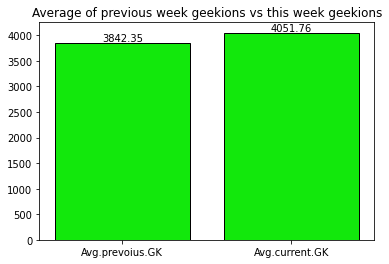

In [10]:
#Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

x=df["Previous Geekions"].mean()
y=df["CodeKata Score"].mean()
x1="{:.2f}".format(x)
y1="{:.2f}".format(y)
a=[x,y]
value=[x1,y1]
b=["Previous Geekions","CodeKata Score"]
lab=["Avg.prevoius.GK","Avg.current.GK"]
plt.bar(b,a,fc="#12e80c",ec="k")
for i in range(len(a)):
  plt.text(i,a[i],value[i],ha="center",va="bottom")
plt.xticks(b,lab)
plt.title("Average of previous week geekions vs this week geekions")

In [11]:
#No of students participated

active=df[df["Rising"]!=0]
print("NO OF STUDENTS PARTICIPATED CODEKATA IN THIS WEEK:",len(active))
print("NO OF STUDENTS PARTICIPATED IN PROGRAM:",len(df))

NO OF STUDENTS PARTICIPATED CODEKATA IN THIS WEEK: 22
NO OF STUDENTS PARTICIPATED IN PROGRAM: 119


In [12]:
#Average completion of python course or my_sql or python english or computational thinking

python_avg=df["python"].mean()
mysql_avg=df["mysql"].mean()
python_en_avg=df["python_en"].mean()
com_think_avg=df["computational_thinking"].mean()
print("THE AVERAGE COMPETION OF MYSQL IS :","{:.1f}".format(mysql_avg))
print("THE AVERAGE COMPETION OF PYTHON IS :","{:.1f}".format(python_avg))
print("THE AVERAGE COMPETION OF PYTHON_EN IS :","{:.1f}".format(python_en_avg))
print("THE AVERAGE COMPETION OF COMPUTATIONAL_THINKING IS :","{:.1f}".format(com_think_avg))

THE AVERAGE COMPETION OF MYSQL IS : 23.5
THE AVERAGE COMPETION OF PYTHON IS : 54.4
THE AVERAGE COMPETION OF PYTHON_EN IS : 29.7
THE AVERAGE COMPETION OF COMPUTATIONAL_THINKING IS : 2.2


In [13]:
#rising star of the week (top 3 candidate who performed well in that particular week)

rising=df.sort_values("Rising",ascending=False,ignore_index=True)
rising.index+=1
print(rising["Name"].head(3))

1             shifak N
2       Narasimhan Y L
3    Ganesh Ramkumar R
Name: Name, dtype: object


In [14]:
#Shining stars of the week (top 3 candidates who has highest geekions)

shining=df.sort_values("CodeKata Score",ascending=False)
shining.index+=1
print(shining["Name"].head(3))

1      A.Dharani
2    V.JEEVITHA 
3    HEMAVATHI.R
Name: Name, dtype: object


In [15]:
#Department wise codekata performence (pie chart)

import plotly.express as px
fig=px.pie(df,names=["Computer Science and Engineering","Electronics and Communication Engineering","Electronics and Electrical Engineering "],values=(df.groupby("Department")["CodeKata Score"]).mean(),title="DEPARTMENT WISE CODEKATA PERFORMANCE")
fig.show()

In [16]:
#Department wise toppers (horizantal bar graph or any visual representations of your choice)

# for sorting based on geekions of particular department i have created new columns CSian,EEEian,ECEian.with their geekions of respective row.
def CSian(row):
  if row["Department"]=="Computer Science and Engineering":
    return row["CodeKata Score"]
df["CSian"]=df.apply(CSian,axis=1)

def EEEian(row):
  if row["Department"]=="Electronics and Electrical Engineering":
    return row["CodeKata Score"]
df["EEEian"]=df.apply(EEEian,axis=1)

def ECEian(row):
  if row["Department"]=="Electronics and Communication Engineering":
    return row["CodeKata Score"]
df["ECEian"]=df.apply(ECEian,axis=1)

In [17]:
cse_topper=df.sort_values("CSian",ascending=False,ignore_index=True).head(3)
#to display result from index "1" increased the value of index to "1" from default "0"
cse_topper.index +=1
print(cse_topper["Name"])

1      A.Dharani
2    V.JEEVITHA 
3    HEMAVATHI.R
Name: Name, dtype: object


In [18]:
eee_topper=df.sort_values("EEEian",ascending=False,ignore_index=True).head(3)
eee_topper.index +=1
print(eee_topper["Name"])

1    ASHOK KUMAR K
2        VIINU V P
3         shifak N
Name: Name, dtype: object


In [19]:
ece_topper=df.sort_values("ECEian",ascending=False,ignore_index=True).head(3)
ece_topper.index +=1
print(ece_topper["Name"])

1    Bodipudi Harini
2          Gowtham R
3      KALAIARASAN K
Name: Name, dtype: object


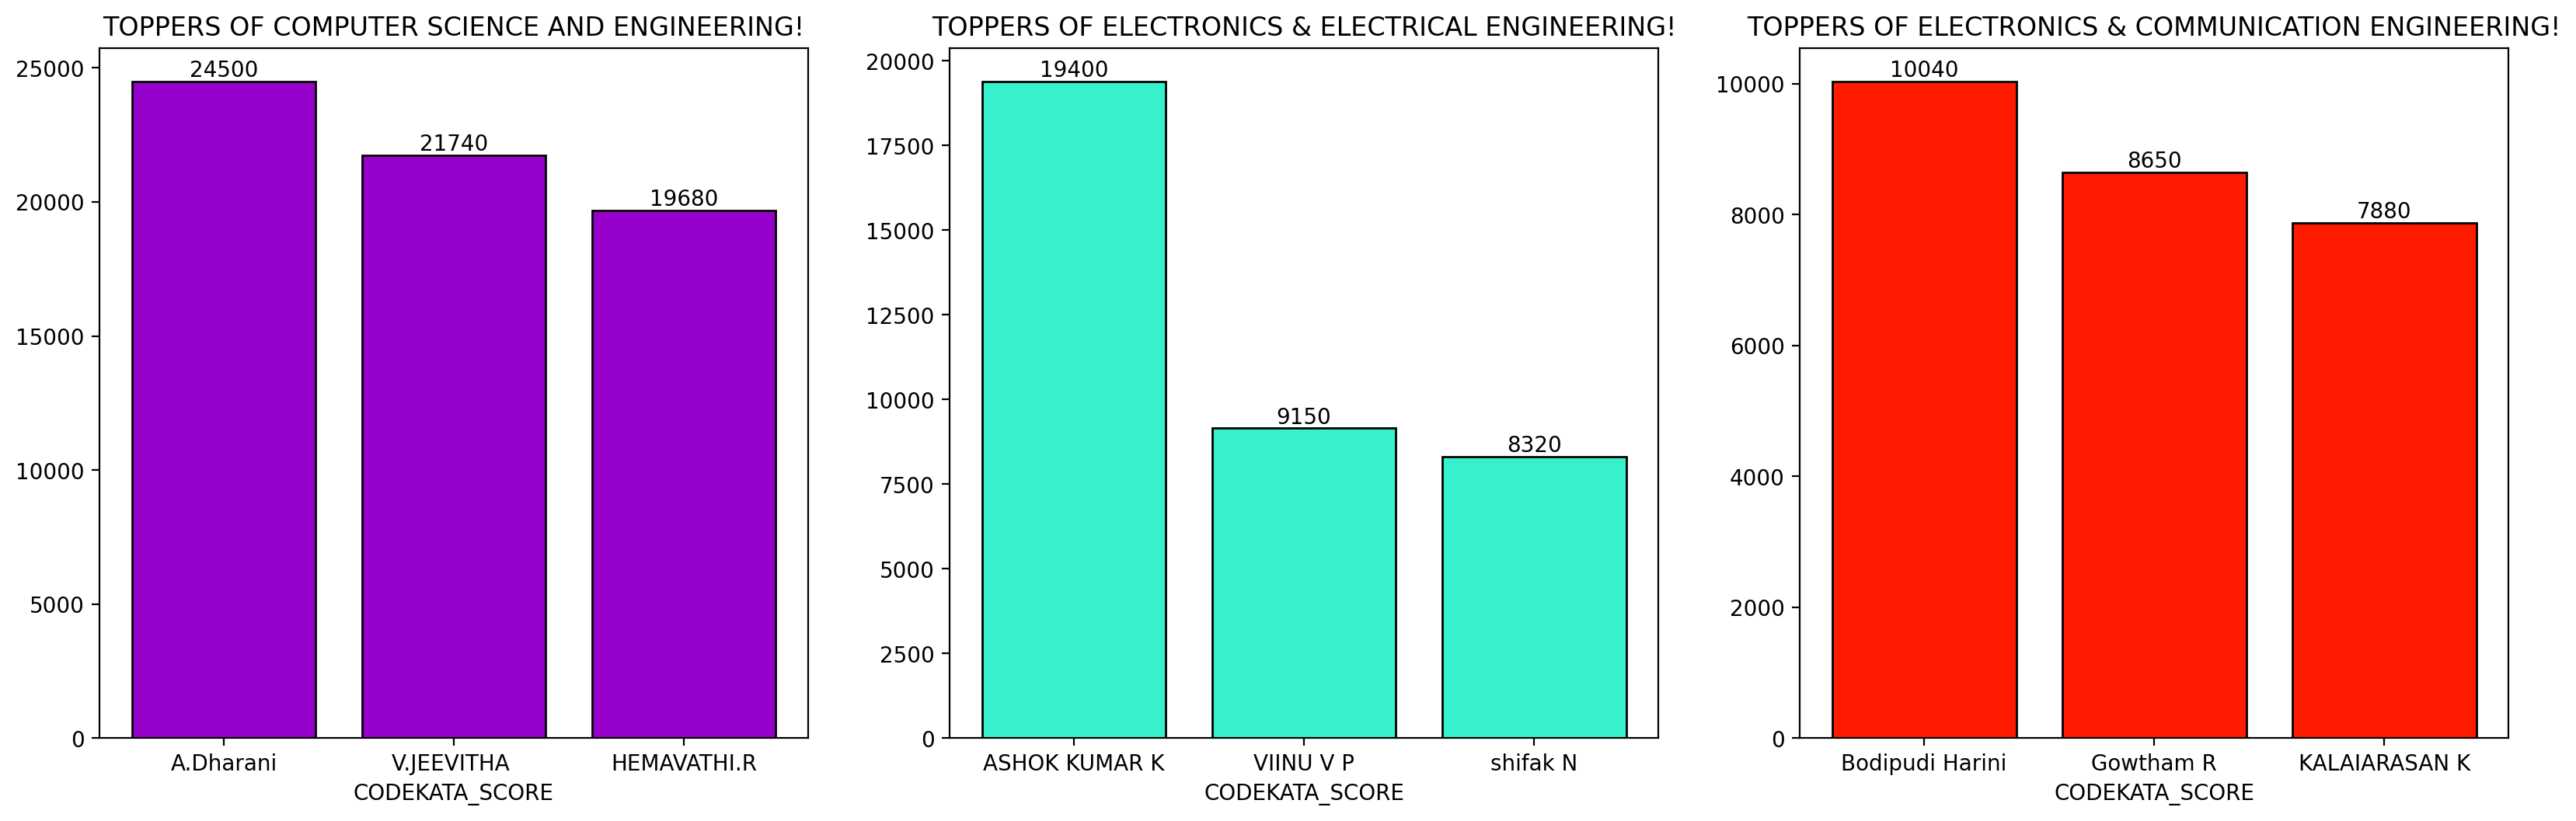

In [23]:
plt.figure(figsize=(20,20),dpi=200)
plt.subplot(3,3,1)
plt.bar(cse_topper["Name"],cse_topper["CodeKata Score"],fc="#9701cc",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF COMPUTER SCIENCE AND ENGINEERING!")
for i in range(1,len(cse_topper)+1):
  plt.text(i-1,cse_topper["CodeKata Score"][i],cse_topper["CodeKata Score"][i],ha="center",va="bottom")
###############
plt.subplot(3,3,2)
plt.bar(eee_topper["Name"],eee_topper["CodeKata Score"],fc="#37f1cc",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF ELECTRONICS & ELECTRICAL ENGINEERING!")
plt.xlabel("CODEKATA_SCORE")
for i in range(1,len(eee_topper)+1):
  plt.text(i-1,eee_topper["CodeKata Score"][i],eee_topper["CodeKata Score"][i],ha="center",va="bottom")
###############
plt.subplot(3,3,3)
plt.bar(ece_topper["Name"],ece_topper["CodeKata Score"],fc="#ff1b00",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF ELECTRONICS & COMMUNICATION ENGINEERING!")
for i in range(1,len(ece_topper)+1):
  plt.text(i-1,ece_topper["CodeKata Score"][i],ece_topper["CodeKata Score"][i],ha="center",va="bottom")
###############

#plt.tight_layout()
plt.show()

In [24]:
df.to_csv("/content/merged.csv")